Generate 1_000 terms and run it via LO & RI strategies, and after it run it on e-greedy non-det step-based [LO, RI] and [LO, LI, RI, RO, Rand] policy with drawing weights.

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *
from calculus_utils.outliers_cleaning import clear_arr

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 20

terms = []
stepsLO = []
stepsRI = []

# 5 threads should be enough for generating 1000 terms
gen_treads = [GenTermsThreadV2(count_terms=200, thread_name=i,
                               mode="RI") for i in range(5)]
for gen_tread in gen_treads:
    gen_tread.start()

for gen_tread in gen_treads:
    if gen_tread.is_alive():
        gen_tread.join()

for gen_tread in gen_treads:
    terms += gen_tread.get_terms()
    stepsLO += gen_tread.get_stepsLO()
    stepsRI += gen_tread.get_stepsRI()

Th_0: generated 200 terms
Th_1: generated 201 terms
Th_2: generated 200 terms
Th_3: generated 200 terms
Th_4: generated 202 terms
Running thread: 0
Thread 0 is doing RI norm
Running thread: 1
Thread 1 is doing RI norm
Running thread: 2
Thread 2 is doing RI norm


  0%|          | 0/201 [00:00<?, ?it/s]

Running thread: 3
Thread 3 is doing RI norm


Running thread: 4
Thread 4 is doing RI norm


  0%|          | 0/200 [00:00<?, ?it/s]

 12%|█▏        | 24/200 [00:01<00:00, 192.99it/s]


  0%|          | 0/202 [00:00<?, ?it/s]



  0%|          | 0/200 [00:00<?, ?it/s]


  9%|▉         | 19/202 [00:02<00:00, 188.08it/s]


 19%|█▉        | 38/202 [00:08<00:41,  4.00it/s] 


 23%|██▎       | 46/202 [00:10<00:38,  4.09it/s]


 25%|██▌       | 51/202 [00:11<00:36,  4.13it/s]


 27%|██▋       | 54/202 [00:13<00:43,  3.42it/s]


 28%|██▊       | 56/202 [00:14<00:50,  2.90it/s]


 12%|█▏        | 24/200 [00:21<00:00, 192.99it/s]


 29%|██▉       | 59/202 [00:19<01:15,  1.89it/s]


 30%|██▉       | 60/202 [02:24<36:11, 15.30s/it]


 30%|███       | 61/202 [02:26<31:22, 13.35s/it]


 31%|███       | 62/202 [02:27<26:21, 11.29s/it]


 31%|███       | 63/202 [02:29<21:56,  9.47s/it]


 32%|███▏      | 64/202 [02:31<17:42,  7.70s/it]


 32%|███▏      | 65/202 [02:33<14:48,  6.48s/it]

 10%|█         | 20/200 [02:37<23:29,  7.83s/it]


 33%|███▎      | 66/202 [02:36<11:56,  5.27s/it]

 10%|

Thread 4 is DONE RI norm
Thread 4 is DONE



 83%|████████▎ | 166/200 [09:19<00:54,  1.60s/it]

 84%|████████▎ | 167/200 [09:21<00:45,  1.37s/it]

 84%|████████▍ | 168/200 [09:23<00:46,  1.45s/it]

 84%|████████▍ | 169/200 [09:24<00:47,  1.54s/it]

 85%|████████▌ | 170/200 [09:26<00:48,  1.63s/it]

 86%|████████▌ | 171/200 [09:28<00:51,  1.79s/it]

 86%|████████▌ | 172/200 [09:30<00:48,  1.73s/it]

 86%|████████▋ | 173/200 [09:32<00:45,  1.69s/it]

 87%|████████▋ | 174/200 [09:33<00:44,  1.70s/it]

 88%|████████▊ | 175/200 [09:35<00:43,  1.73s/it]

 88%|████████▊ | 176/200 [09:37<00:41,  1.75s/it]

 90%|████████▉ | 179/200 [09:41<00:35,  1.71s/it]



 90%|█████████ | 180/200 [09:43<00:31,  1.56s/it]



 90%|█████████ | 181/200 [09:45<00:32,  1.69s/it]

 65%|██████▌   | 130/200 [09:45<05:36,  4.81s/it]



 91%|█████████ | 182/200 [09:46<00:26,  1.49s/it]

 66%|██████▌   | 131/200 [09:46<04:13,  3.67s/it]



 92%|█████████▏| 183/200 [09:48<00:24,  1.45s/it]

 66%|██████▌   | 132/200 [09:48<03:24,  3.00s/it]



 92%|█████████▏| 184

Thread 0 is DONE RI norm
Thread 0 is DONE






 33%|███▎      | 66/200 [10:11<02:57,  1.32s/it]

 76%|███████▌  | 152/200 [10:16<00:59,  1.24s/it]



 34%|███▎      | 67/200 [10:12<02:48,  1.27s/it]

 76%|███████▋  | 153/200 [10:17<00:55,  1.17s/it]



 34%|███▍      | 68/200 [10:13<02:41,  1.22s/it]

 77%|███████▋  | 154/200 [10:18<00:51,  1.13s/it]



 34%|███▍      | 69/200 [10:14<02:27,  1.12s/it]

 78%|███████▊  | 155/200 [10:19<00:47,  1.06s/it]



 35%|███▌      | 70/200 [10:15<02:18,  1.07s/it]

 78%|███████▊  | 156/200 [10:20<00:45,  1.03s/it]



 36%|███▌      | 71/200 [10:16<02:12,  1.03s/it]

 78%|███████▊  | 157/200 [10:21<00:44,  1.03s/it]



 36%|███▌      | 72/200 [10:17<02:07,  1.01it/s]

 79%|███████▉  | 158/200 [10:22<00:41,  1.02it/s]



 36%|███▋      | 73/200 [10:18<02:09,  1.02s/it]

 80%|███████▉  | 159/200 [10:23<00:40,  1.02it/s]



 37%|███▋      | 74/200 [10:19<02:04,  1.01it/s]

 80%|████████  | 160/200 [10:24<00:38,  1.03it/s]



 38%|███▊      | 75/200 [10:20<02:06,  1.02s/it]

 80%|████████  | 16

Thread 2 is DONE RI norm
Thread 2 is DONE






 62%|██████▎   | 125/200 [11:04<00:51,  1.44it/s]



 63%|██████▎   | 126/200 [11:04<00:46,  1.58it/s]



 64%|██████▎   | 127/200 [11:05<00:42,  1.72it/s]



 64%|██████▍   | 128/200 [11:05<00:38,  1.87it/s]



 45%|████▍     | 90/201 [11:11<09:15,  5.00s/it]]



 65%|██████▌   | 130/200 [11:06<00:33,  2.11it/s]



 66%|██████▌   | 131/200 [11:06<00:32,  2.10it/s]



 66%|██████▌   | 132/200 [11:07<00:31,  2.17it/s]



 66%|██████▋   | 133/200 [11:07<00:30,  2.19it/s]



 67%|██████▋   | 134/200 [11:08<00:30,  2.14it/s]



 68%|██████▊   | 135/200 [11:08<00:30,  2.11it/s]



 68%|██████▊   | 136/200 [11:09<00:31,  2.05it/s]



 68%|██████▊   | 137/200 [11:09<00:31,  2.01it/s]



 69%|██████▉   | 138/200 [11:10<00:29,  2.09it/s]



 70%|██████▉   | 139/200 [11:10<00:28,  2.17it/s]



 70%|███████   | 140/200 [11:10<00:27,  2.18it/s]



 70%|███████   | 141/200 [11:11<00:27,  2.17it/s]



 71%|███████   | 142/200 [11:11<00:27,  2.14it/s]



 72%|███████▏  | 143/200 [11:12<00:25,  2.

Thread 3 is DONE RI norm
Thread 3 is DONE


100%|██████████| 201/201 [12:31<00:00,  3.74s/it]

Thread 1 is DONE RI norm
Thread 1 is DONE


In [3]:
print(f"Total terms count: {len(terms)}")
print(f"steps LO: {stepsLO}")
print(f"steps RI: {stepsRI}")

Total terms count: 1003
steps LO: [4, 9, 2, 9, 5, 2, 7, 1, 12, 13, 12, 5, 6, 3, 17, 6, 4, 15, 1, 3, 5, 4, 10, 3, 6, 6, 5, 6, 8, 8, 8, 5, 4, 6, 4, 9, 8, 9, 11, 8, 5, 8, 2, 5, 4, 4, 3, 5, 6, 7, 41, 16, 21, 38, 9, 62, 2, 3, 3, 2, 7, 14, 3, 6, 35, 14, 13, 1, 1, 4, 8, 4, 9, 5, 9, 4, 5, 9, 9, 3, 4, 6, 1, 2, 7, 1, 9, 19, 2, 10, 16, 2, 20, 13, 6, 7, 10, 13, 7, 1, 3, 7, 3, 7, 6, 4, 3, 11, 2, 3, 9, 3, 6, 4, 24, 10, 8, 4, 2, 13, 10, 15, 13, 8, 8, 6, 8, 14, 2, 3, 9, 2, 11, 3, 3, 2, 4, 5, 3, 23, 6, 70, 54, 13, 6, 24, 5, 16, 11, 5, 1, 14, 4, 11, 2, 1, 5, 1, 8, 9, 6, 7, 5, 5, 5, 6, 15, 10, 6, 10, 1, 2, 4, 6, 4, 4, 10, 2, 3, 1, 26, 5, 13, 4, 4, 17, 5, 5, 12, 6, 4, 8, 3, 12, 15, 34, 2, 3, 6, 5, 5, 3, 6, 17, 1, 7, 7, 1, 6, 20, 2, 6, 3, 5, 4, 5, 4, 5, 13, 21, 3, 2, 12, 3, 1, 2, 17, 16, 19, 2, 2, 4, 3, 4, 3, 8, 2, 5, 1, 14, 2, 1, 12, 16, 7, 5, 2, 3, 2, 1, 8, 4, 16, 5, 4, 20, 15, 2, 4, 9, 7, 3, 6, 3, 21, 7, 4, 4, 3, 1, 5, 6, 4, 3, 15, 4, 7, 6, 8, 2, 4, 6, 8, 18, 4, 10, 5, 8, 5, 1, 6, 5, 4, 10, 27, 12, 1, 2

In [4]:
max_count_steps_rlenv = 100
strategies_env_2 = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]
strategies_env_5 = [
    LeftmostOutermostStrategy(), LeftmostInnermostStrategy(),
    RightmostInnermostStrategy(),RightmostOutermostStrategy(),
    RandomStrategy()
]

explore_actions = 150
epsilon = 0.1

In [5]:
env_2 = LambdaEnv(strategies=strategies_env_2,
                lambda_terms=terms,
                max_step_term=max_count_steps_rlenv,
                count_terms=len(terms))

env_5 = LambdaEnv(strategies=strategies_env_5,
                lambda_terms=terms,
                max_step_term=max_count_steps_rlenv,
                count_terms=len(terms))

In [6]:
_, steps_eg_step_non_env_2 = \
    run_e_greedy_policy(environment=env_2,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=False,
                        is_action_based=True,
                        return_steps=True)

In [7]:
_, steps_eg_step_non_env_5 = \
    run_e_greedy_policy(environment=env_5,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=False,
                        is_action_based=True,
                        return_steps=True)

In [8]:
w2_history = np.array(env_2.get_weights_history())
w5_history = np.array(env_5.get_weights_history())

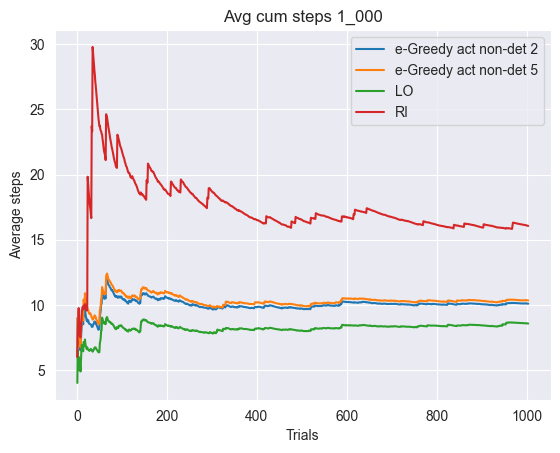

In [9]:
comp_data = {
    "e-Greedy act non-det 2": (steps_eg_step_non_env_2, "-"),
    "e-Greedy act non-det 5": (steps_eg_step_non_env_5, "-"),
    "LO": (stepsLO, "-"),
    "RI": ([steps if steps != np.inf else 250 for steps in stepsRI], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps 1_000")

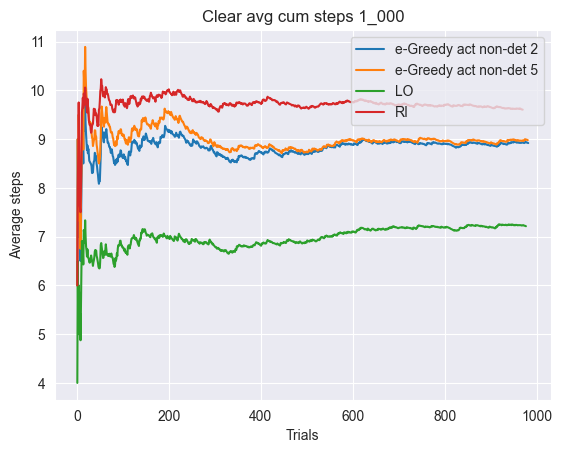

In [10]:
comp_data = {
    "e-Greedy act non-det 2": (clear_arr(steps_eg_step_non_env_2), "-"),
    "e-Greedy act non-det 5": (clear_arr(steps_eg_step_non_env_5), "-"),
    "LO": (clear_arr(stepsLO), "-"),
    "RI": (clear_arr(stepsRI), "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Clear avg cum steps 1_000")

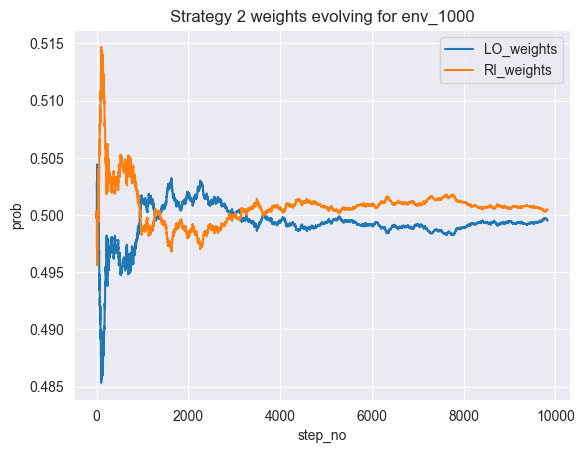

In [11]:
plt.plot(range(len(w2_history)),
         w2_history[:, 0], "-", label="LO_weights")
plt.plot(range(len(w2_history)),
         w2_history[:, 1], "-", label="RI_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy 2 weights evolving for env_1000")
plt.legend(loc="upper right")
plt.show()

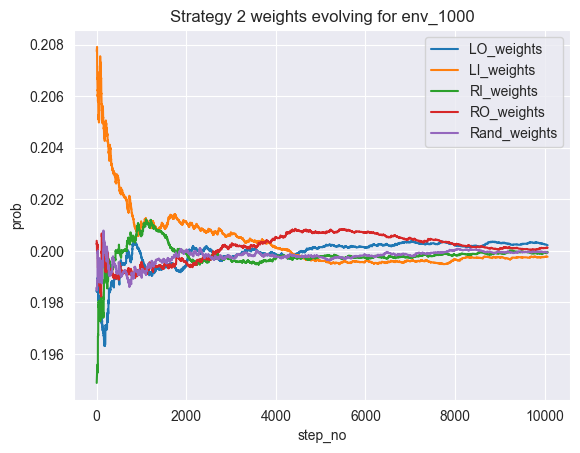

In [12]:
plt.plot(range(len(w5_history)),
         w5_history[:, 0], "-", label="LO_weights")
plt.plot(range(len(w5_history)),
         w5_history[:, 1], "-", label="LI_weights")
plt.plot(range(len(w5_history)),
         w5_history[:, 2], "-", label="RI_weights")
plt.plot(range(len(w5_history)),
         w5_history[:, 3], "-", label="RO_weights")
plt.plot(range(len(w5_history)),
         w5_history[:, 4], "-", label="Rand_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy 2 weights evolving for env_1000")
plt.legend(loc="upper right")
plt.show()